In [ ]:
PROBLEM STATEMENT:
The datasets contains transactions made by credit cards in September 2013 by european cardholders. 
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions.
The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately,
due to confidentiality issues, we cannot provide the original features and more background information about the data.
Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed
with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first
transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant 
cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [ ]:
kaggle dataset : https://www.kaggle.com/mlg-ulb/creditcardfraud/data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

from numpy import genfromtxt
from scipy.stats import multivariate_normal
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,classification_report 
from sklearn import svm
from sklearn.model_selection import train_test_split  

C:\Users\Karthik\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df1=pd.read_csv('C:/Users/Karthik/Desktop/KDrive/ALL projects/Anomaly Detecn-Bank Fraud/creditcard.csv')

In [3]:
df1.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
df1[df1.Class==0].count()[1]

284315

In [5]:
df1[df1.Class==1].count()[1]

492

In [6]:
df1[df1.Class==1].count()[1]/df1.count()[1]

0.001727485630620034

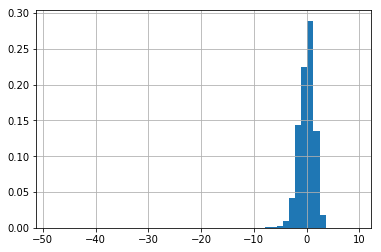

In [7]:
df1.V3.hist(bins=50,density='True')
#df1.V4.hist(bins=50)

#### Initial few features are plotted for checking the normality/gaussian distribution assumption which though is not a hard and fast requirement

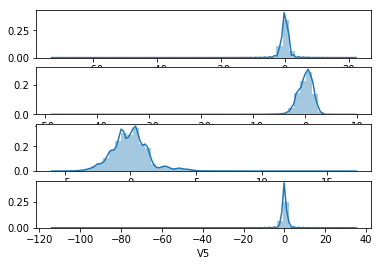

In [8]:
import seaborn as sns
f, (ax1, ax2,ax3, ax4) = plt.subplots(4)
sns.distplot(df1.V2,ax=ax1)
sns.distplot(df1.V3,ax=ax2)
sns.distplot(df1.V4,ax=ax3)
sns.distplot(df1.V5,ax=ax4)


In [9]:
a=df1[df1.Class==0].mean(axis=0)
a=pd.DataFrame(a)
newdf1 = a.iloc[1:29,]

In [10]:
b=df1[df1.Class==1].mean(axis=0)
b=pd.DataFrame(b)
newdf2 = b.iloc[1:29,]

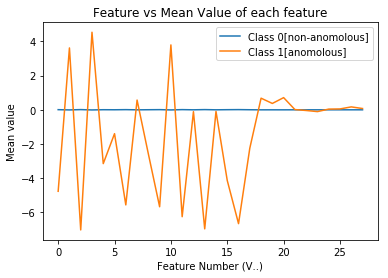

In [11]:
x=np.arange(28)
plt.plot(x,newdf1)
plt.plot(x,newdf2)
plt.legend(['Class 0[non-anomolous]', 'Class 1[anomolous]'], loc='upper right')
plt.xlabel('Feature Number (V..)')
plt.ylabel('Mean value')
plt.title('Feature vs Mean Value of each feature')
plt.show()

#### Magnified and split up version of above graph

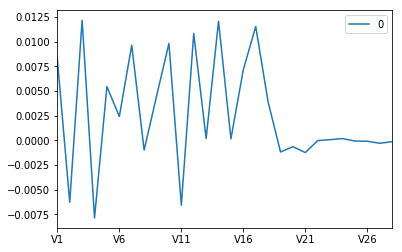

In [12]:
newdf1.plot()

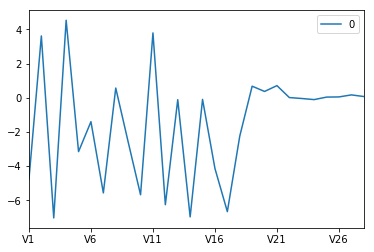

In [13]:
newdf2.plot()

### From the above graphs, it can be seen that, certain features of anomolous and non-anomolous values' means are indistinguishable and hence are removed

In [14]:
cols = [0,29]
df1.drop(df1.columns[cols],axis=1,inplace=True)

In [15]:
df1.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class'],
      dtype='object')

In [16]:
cols = [7, 12, 14, 18,19,20,21,22,23,24,25,26,27]
df1.drop(df1.columns[cols],axis=1,inplace=True)

In [17]:
df1.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12',
       'V14', 'V16', 'V17', 'V18', 'Class'],
      dtype='object')

In [18]:
df_svm=df1 # create a copy of the daatset for doing one class in later sections

### Train-Cross Validation-Test split

In [19]:
negData = df1.groupby('Class').get_group(0)
posData = df1.groupby('Class').get_group(1)

#following are dataframes sliced and not indices
# Give 60:20:20 split for non-anomolous data into train, validation and test sets
train, negCV, negTest = np.split(negData.sample(frac=1), [int(.6*len(negData)), int(.8*len(negData))])

# Give 50:50 split for anomolous exampels for validation and test sets
posCV, posTest = np.split(posData.sample(frac=1), 2) 

# Concatenate to form final cv and test DataFrame set
cv = negCV.append(posCV)
test = negTest.append(posTest)

In [20]:
Xtrain = train[train.columns[0:15]]
Ytrain = train[train.columns[15:]]
XCV = cv[cv.columns[0:15]]
YCV = cv[cv.columns[15:]]
Xtest = test[test.columns[0:15]]
Ytest = test[test.columns[15:]]

In [21]:
Xtrain

,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18
42354,-0.791323,0.122418,2.028377,0.186637,0.164921,0.838906,-0.296780,0.417125,-0.536347,1.024051,0.860273,-0.191593,-0.101711,-0.211816,-0.339933
56373,1.242710,-0.793228,0.374053,-0.373310,-1.122169,-0.613830,-0.527705,-0.386690,0.472604,-0.277636,-0.730544,-0.142040,0.138256,1.178149,-2.170078
272756,-1.595079,1.273539,-0.192427,-1.597099,0.219719,-0.478813,0.352992,-0.150878,-1.245777,-1.690886,0.110882,0.482653,0.729708,-0.643692,-0.359400
260079,1.906856,-0.281120,-1.196473,0.703067,-0.007008,-0.171771,-0.250275,1.268682,-0.715663,-1.081058,0.392105,-1.677154,0.171990,0.942909,-0.445431
15737,1.263565,0.248662,-0.085738,0.942127,0.082151,-0.489679,0.200360,0.098727,0.018533,-1.212135,-0.301921,0.423682,0.315121,-0.707402,0.175523
88772,-2.074349,-2.253113,1.220184,-0.159201,-0.023512,-0.919730,0.507808,-1.630092,-0.035451,-0.082080,-0.705107,-0.091554,-0.203166,1.326707,-1.760232
99436,1.190555,-1.038188,-0.684583,-0.638295,-0.439473,-0.219484,-0.082469,-0.622870,0.569111,-2.100103,-0.836611,0.102582,-1.337136,-0.152602,1.164815
82024,1.260133,0.376625,0.289225,0.677149,-0.314586,-1.032975,0.108569,-0.014426,-0.292523,-0.059335,0.394679,-0.357557,0.479262,-0.044907,-0.321896
58104,1.176640,0.077912,0.098000,0.501877,-0.428312,-1.091428,0.227944,-0.173322,0.158184,1.347497,0.020278,1.077943,0.256532,-0.315291,-0.212735
89587,-1.290694,1.716589,0.251544,1.014344,-0.507471,-0.233675,-0.105719,-0.482875,0.051038,-1.490325,-0.369807,0.846917,0.316407,-0.085695,0.329359


In [22]:
Ytrain

,Class
42354,0
56373,0
272756,0
260079,0
15737,0
88772,0
99436,0
82024,0
58104,0
89587,0


In [23]:
cv.shape[0]

57109

In [24]:
test.shape[0]

57109

### Multi-variate gaussian anomaly detection implementation

In [25]:

def feature_normalize(dataset):
    mu = np.mean(dataset,axis=0)
    sigma = np.std(dataset,axis=0)
    return (dataset - mu)/sigma

def estimateGaussian(dataset):
    mu = np.mean(dataset, axis=0)
    sigma = np.cov(dataset.T)
    return mu, sigma
    
def multivariateGaussian(dataset,mu,sigma):
    p= multivariate_normal(mean=mu, cov=sigma)
    return p.pdf(dataset)


def selectThresholdByCV(probs,gt):
    best_epsilon = 0
    best_f1 = 0
    f = 0
    stepsize = (max(probs) - min(probs)) / 1000;
    epsilons = np.arange(min(probs),max(probs),stepsize)
    for epsilon in np.nditer(epsilons):
        predictions = (probs < epsilon) 
        f = f1_score(gt, predictions,average='binary')
        if f > best_f1:
            best_f1 = f
            best_epsilon = epsilon
    final_best_predictions=(probs<best_epsilon)        
    confusion_matr=confusion_matrix(gt, final_best_predictions)  
    precision=precision_score(gt, final_best_predictions, average="macro")
    recall=recall_score(gt, final_best_predictions, average="macro")
    return best_f1, best_epsilon,confusion_matr,precision,recall

In [26]:
Xtrain=feature_normalize(Xtrain)
XCV=feature_normalize(XCV)
Xtest=feature_normalize(Xtest)

In [27]:
mu, sigma = estimateGaussian(Xtrain)

In [28]:
p = multivariateGaussian(Xtrain,mu,sigma)
p_cv = multivariateGaussian(XCV,mu,sigma)

In [29]:
max(p_cv)

9.9250028426854184e-07

In [30]:
min(p_cv)

0.0

In [31]:
p_cv[p_cv==0]=min(p_cv[p_cv>0])

In [32]:
p_cv=np.log(p_cv)

In [33]:
max(p_cv)

-13.82303853796844

In [34]:
min(p_cv)

-738.80528231821199

In [35]:
fscore, ep, confusion_matr,precision,recall = selectThresholdByCV(p_cv,YCV)
print("Best Epsilon cut off:",ep)
print("F1 score:",fscore)
print("confusion matrix:\n",confusion_matr)
print("precision:",precision)
print("recall:",recall)

C:\Users\Karthik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Best Epsilon cut off: -208.84326211486223
F1 score: 0.752066115702
confusion matrix:
 [[56807    56]
 [   64   182]]
precision: 0.881790264241
recall: 0.869426287601


In [36]:
ptest = multivariateGaussian(Xtest, mu, sigma)

In [37]:
ptest[ptest==0]=min(ptest[ptest>0])
ptest=np.log(ptest)

In [38]:
prediction_test=(ptest<ep).astype(int)
#ytest_prediction = np.squeeze(ytest.values).astype(int)

In [39]:
print("F1 Score:",f1_score(Ytest,prediction_test,average='binary'))
print("Precision:",precision_score(Ytest,prediction_test, average="macro"))
print("Recall",recall_score(Ytest,prediction_test, average="macro"))  

F1 Score: 0.8
Precision: 0.914354897156
Recall 0.885835932291


In [40]:
confusion_matrix(Ytest,prediction_test)

array([[56824,    39],
       [   56,   190]], dtype=int64)

# Method 2 - One-Class SVM for Anomaly Detection

In [61]:
df_svm.loc[df_svm['Class'] == 0, "Temp_class"] = 1  
df_svm.loc[df_svm['Class'] != 0, "Temp_class"] = -1

In [62]:
target = df_svm['Temp_class']

In [63]:
outliers = target[target == -1]  
print("outliers.shape", outliers.shape)  
print("outlier fraction", outliers.shape[0]/target.shape[0])

outliers.shape (492,)
outlier fraction 0.001727485630620034


In [64]:
df_svm.drop(["Class", "Temp_class"], axis=1, inplace=True)

In [65]:
df_svm.shape

(284807, 15)

In [66]:
#try tuning the train_size,gamma with a function and try bootstrapping to give a CI 
train_data, test_data, train_target, test_target = train_test_split(df_svm, target, train_size = 0.8)  
train_data.shape  

C:\Users\Karthik\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


(227845, 15)

In [67]:
nu = outliers.shape[0] / target.shape[0]  
print("nu", nu)

nu 0.001727485630620034


In [68]:
def SVM_model(nu_k,data):
    clf = svm.OneClassSVM(nu=nu_k, kernel="rbf", gamma='auto') #gamma can be tuned to find the optimum [gamma determines the rigidity of the fit]
    return(clf.fit(data))

def scores(clf,t_data,t_target):
    preds = clf.predict(t_data)  
    targs = t_target
    print("accuracy: ", metrics.accuracy_score(targs, preds))  
    print("precision: ", metrics.precision_score(targs, preds))  
    print("recall: ", metrics.recall_score(targs, preds))  
    print("f1: ", metrics.f1_score(targs, preds))  
    print("area under curve (auc): ", metrics.roc_auc_score(targs, preds))  

-   <b>when nu is known [when the data is labelled]:</b>

In [69]:
clf = SVM_model(nu,train_data) #nu is known if the number of anomolous data in the given data is labelled and known
scores(clf,train_data,train_target)

accuracy:  0.993131295398
precision:  0.998719426303
recall:  0.994394273806
f1:  0.99655215716
area under curve (auc):  0.6337886156


In [70]:
scores(clf,test_data,test_target)

accuracy:  0.988676661634
precision:  0.999254102437
recall:  0.989396683606
f1:  0.99430096221
area under curve (auc):  0.76889189019


-   <b>when nu in unkown (manual ratio of anomolous data is assumed based on previous knowledge):</b>

In [71]:
clf = SVM_model(0.05,train_data) #nu is known if the number of anomolous data in the given data is labelled and known
scores(clf,train_data,train_target)

accuracy:  0.95149333977
precision:  0.999796749845
recall:  0.951601698865
f1:  0.97510407093
area under curve (auc):  0.920663004821


In [72]:
scores(clf,test_data,test_target)

accuracy:  0.951335978372
precision:  0.999759806367
recall:  0.951484991823
f1:  0.975025227043
area under curve (auc):  0.905850022793


### It can be clearly seen that, when the ratio of anomolous data is known, the model performs well.

#### This SVM model can be used on the real time data which were not used in the training of the model

In [ ]:
-----------------------------------------------------------------------------------------------------------------------------

# Method 3- Undersampling and using logistic Regression

In [41]:
# Number of data points in the minority class
number_records_fraud = len(df1[df1.Class == 1])
fraud_indices = np.array(df1[df1.Class == 1].index)

# Picking the indices of the normal classes
normal_indices = df1[df1.Class == 0].index

# Out of the indices we picked, randomly select "x" number (number_records_fraud)
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace = False)
random_normal_indices = np.array(random_normal_indices)

# Appending the 2 indices
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])

# Under sample dataset
under_sample_data = df1.iloc[under_sample_indices,:]

X_undersample = under_sample_data.ix[:, under_sample_data.columns != 'Class']
y_undersample = under_sample_data.ix[:, under_sample_data.columns == 'Class']

# Showing ratio
print("Percentage normal transactions: ", len(under_sample_data[under_sample_data.Class == 0])/len(under_sample_data))
print("Percentage fraud transactions: ", len(under_sample_data[under_sample_data.Class == 1])/len(under_sample_data))
print("Total number of transactions in resampled data: ", len(under_sample_data))

Percentage normal transactions:  0.5
Percentage fraud transactions:  0.5
Total number of transactions in resampled data:  984


C:\Users\Karthik\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


In [42]:
X = df1.ix[:, df1.columns != 'Class']
y = df1.ix[:, df1.columns == 'Class']

C:\Users\Karthik\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [43]:
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample,y_undersample,test_size = 0.25,random_state = 0)
print("")
print("Number transactions train dataset: ", len(X_train_undersample))
print("Number transactions test dataset: ", len(X_test_undersample))
print("Total number of transactions: ", len(X_train_undersample)+len(X_test_undersample))


Number transactions train dataset:  738
Number transactions test dataset:  246
Total number of transactions:  984


In [44]:
logreg = LogisticRegression()
logreg.fit(X_train_undersample,y_train_undersample)
preds = logreg.predict(X_test_undersample)
pred_probs=logreg.predict_proba(X_test_undersample)[:,1]

C:\Users\Karthik\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


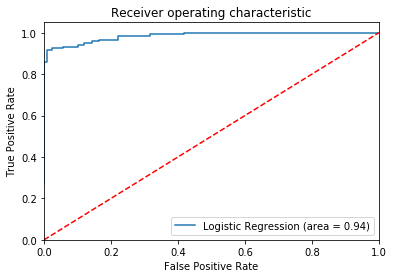

In [45]:
logit_roc_auc = roc_auc_score(y_test_undersample, preds)
fpr, tpr, thresholds = roc_curve(y_test_undersample, pred_probs)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [46]:
    print("accuracy: ", accuracy_score(y_test_undersample, preds))  
    print("precision: ", precision_score(y_test_undersample, preds))  
    print("recall: ", recall_score(y_test_undersample, preds))  
    print("f1: ", f1_score(y_test_undersample, preds))  
    print("area under curve (auc): ", roc_auc_score(y_test_undersample, preds))  

accuracy:  0.939024390244
precision:  0.948275862069
recall:  0.924369747899
f1:  0.936170212766
area under curve (auc):  0.938562826705
